# Catch Basin Classifier

Some initial setup code: 

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from keras import layers

image_size = (500, 500)

## Load and Prepare Data 

Load the data and split into two groups: *training* and *validation*

In [5]:
training_dataset = tf.keras.utils.image_dataset_from_directory("data", validation_split=0.3, subset="training", seed=123, image_size=image_size)
validation_dataset = tf.keras.utils.image_dataset_from_directory("data", validation_split=0.3, subset="validation", seed=123, image_size=image_size)

# Get list of classnames to verify that the class names were interpreted correctly
training_dataset.class_names

Found 24 files belonging to 3 classes.
Using 17 files for training.
Found 24 files belonging to 3 classes.
Using 7 files for validation.


['blocked', 'clear', 'partial']

## Construction of the Model

In [6]:
model = Sequential([
    layers.Rescaling(1./255, input_shape=(*image_size, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(3)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 500, 500, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 500, 500, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 250, 250, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 250, 250, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 125, 125, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 64)        0

## Training

In [7]:
epochs = 10

history = model.fit(
  training_dataset,
  validation_data=validation_dataset,
  epochs=epochs
)

Epoch 1/10
1/1 [==============================] - 4s 4s/step - loss: 1.1018 - accuracy: 0.4706 - val_loss: 47.0879 - val_accuracy: 0.4286
Epoch 2/10
1/1 [==============================] - 2s 2s/step - loss: 34.9316 - accuracy: 0.4706 - val_loss: 49.3334 - val_accuracy: 0.2857
Epoch 3/10
1/1 [==============================] - 3s 3s/step - loss: 36.7521 - accuracy: 0.4118 - val_loss: 26.1745 - val_accuracy: 0.2857
Epoch 4/10
1/1 [==============================] - 3s 3s/step - loss: 18.5318 - accuracy: 0.4118 - val_loss: 8.1040 - val_accuracy: 0.4286
Epoch 5/10
1/1 [==============================] - 3s 3s/step - loss: 3.4218 - accuracy: 0.8235 - val_loss: 5.7043 - val_accuracy: 0.4286
Epoch 6/10
1/1 [==============================] - 2s 2s/step - loss: 3.3983 - accuracy: 0.4706 - val_loss: 2.5347 - val_accuracy: 0.4286
Epoch 7/10
1/1 [==============================] - 2s 2s/step - loss: 1.2095 - accuracy: 0.4706 - val_loss: 1.2960 - val_accuracy: 0.2857
Epoch 8/10
1/1 [===================

## Training Analysis

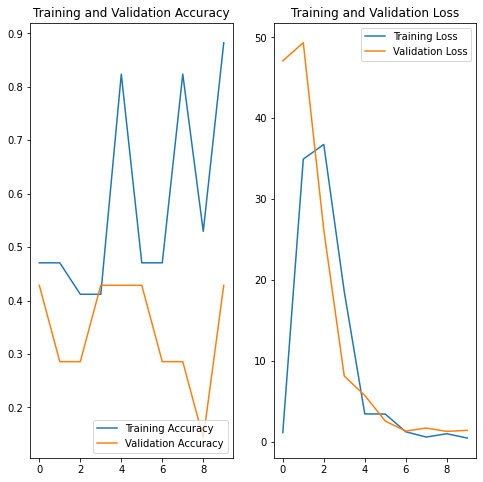

In [8]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), acc, label='Training Accuracy')
plt.plot(range(epochs), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(epochs), loss, label='Training Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [9]:
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(next(iter(validation_dataset))[0])

In [10]:

layer_activation = activations[0]
plt.matshow(layer_activation[0, :, :, 8], cmap ='viridis')

IndexError: index 8 is out of bounds for axis 3 with size 3